# Assignment 4
#### Carey Burns

### Parts 1 & 2: Import the modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
FIN = pd.read_csv('iris.txt')
print(FIN.head(6))

   SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa


### Part 3: Create the Reduced Dataset

In the previous assignment I noticed that petal length and width seemed to be the most dinstinguishing factors that might be useful in predicting species. Due to this observation, I will remove other variables and focus on these two traits.

In [2]:
NewData = FIN[['PetalLength', 'PetalWidth']]
print(NewData.head(6))

   PetalLength  PetalWidth
0          1.4         0.2
1          1.4         0.2
2          1.3         0.2
3          1.5         0.2
4          1.4         0.2
5          1.7         0.4


### Part 4: Create a Scatterplot of the Data
In this scatterplot I can see two distinctive groups in the dataset that are distinguished by petal length and width.

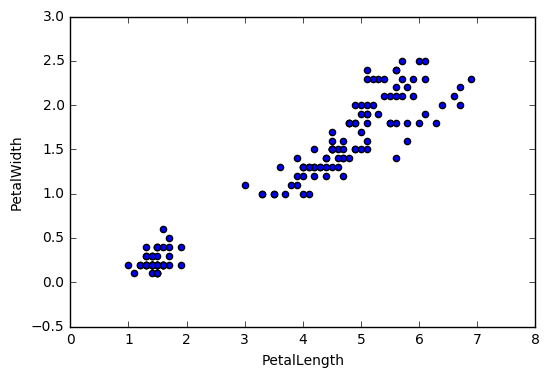

In [3]:
FIN.plot.scatter(x='PetalLength',y='PetalWidth')

### Part 5: Implement the basic functions to create a regression model
- I created two arrays for the length and width measurements outside the function so I can use them later to graph
- I used the ones column using np.ones function and stacked them into the length matrix
- I took the transpose of the ones and length matrix using np.transpose
- I then multiplied the transposed matrix and length matrix
- I took the inverse of this answer
- I then multipled this new matrix with the petal width matrix
- This produced the beta

In [8]:
X = NewData['PetalLength'].values
Y = NewData['PetalWidth'].values
def makedabeta(NewData):
    Ones = np.ones(len(NewData))
    X1 = np.stack((Ones,X), axis=-1)
    Xtrn = np.transpose(X1)
    Xdot = np.dot(Xtrn,X1)
    Xinv = np.linalg.inv(Xdot)
    Xident = np.dot(Xdot,Xinv)
    Ydot = np.dot(Xtrn,Y)
    Beta = np.dot(Xinv,Ydot)
    print(Beta)
    return Beta

### Part 5 Con't: Create a function to use the least squares coefficients to predict the value of a given input point
- I created another function that takes an x value to produce the y intercept

In [14]:
def predicty(x,Beta):
    y = Beta[0]+(x*Beta[1])
    return y

### Part 6: Calculate the Predicted Values
- I use my preticty function to calculate the beta and add it into the matrix in the 3rd column

In [15]:
Beta = makedabeta(NewData)
NewData['PredictedValue'] = predicty(NewData['PetalLength'],Beta)

[-0.36651405  0.41641913]


C:\Users\Carey\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


### Part 7: Plot the regression line on top of a scatter plot of the reduced data set
- Using the X and Y I created above and setting the Z value equal to the predicted value I plot the data and the predicted regression

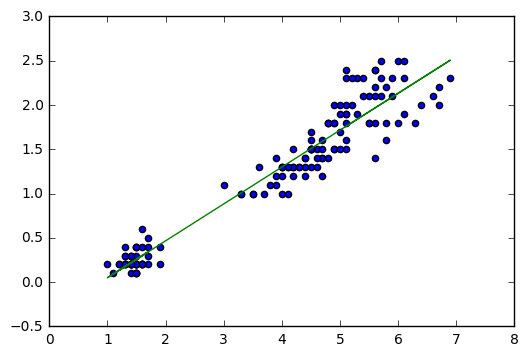

In [11]:
Z = NewData['PredictedValue'].values
plt.scatter(X,Y)
plt.plot(X,Z, color = "green")

### Conclusion: 
I don't understand the value of this model in helping to distinguish the different iris species. I wanted to add the species back into the data and re-run the model using the groupby species. However, I wasn't able to get my code working and ran out of time

In [ ]:
SP=FIN[['Species']]
print(SP.head(6))

In [ ]:
FinalSet=[NewData, SP]
FN=pd.concat(FinalSet, axis=1)
print(FN.head(6))
#NFIN=FN.groupby("Species")
#print(NFIN.head(6))
#X = NFIN['PetalLength'].values
#Y = NFIN['PetalWidth'].values
#Z = NFIN['PredictedValue'].values
#plt.scatter(X,Y)
#plt.plot(X,Z, color = "green")